In [1]:
### Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### Q4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
pd.read_csv('../data/gdp_percapita.csv')

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [7]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [8]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [9]:
### Q5. How many rows and columns are in gdp_df? What are the data types of each column?

In [10]:
# get the information about gdp Dataframe
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [11]:
##Answer-5: gdp_df has total 7662 rows and 4 columns. First column 'Country or Area' has data type object, second column 'year' has int64, third & fourth column Values have float64 data type.
## We can also find number of rows and column using gdp_df.shape which will return (7662,4) and types by using gdp_df.type

In [12]:
### Q6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [13]:
# Drop the Value Footnotes column 
gdp_df = gdp_df.drop(columns='Value Footnotes')

In [14]:
# Rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

# Dibran's way: of renaming columns: gdp_df.columns = ['Country','Year','GDP_Per_Capita'] 

In [15]:
# Check if drop and rename is complete
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [16]:
###Q7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 
#gdp_df_new[gdp_df_new['Country']=='Afghanistan']['Year'].count() # It will help to find the count of years perticilar country has data
#Find out how many year of values each country have
countries = gdp_df.groupby('Country')['Year'].count() 

In [17]:
countries = countries.reset_index()

In [18]:
countries = countries.rename(columns={'Year':'count_of_year'})
countries[countries['count_of_year']==33]['Country'].count()
## Answer a: 202 countries have data for all years

202

In [19]:
countries[countries['count_of_year']<33]['Country'].count()
## Answer b: Total 40 countries does not have entries in all 33 years.

40

In [20]:
#Other way explained by Dibran:
#How many unique years present in 'Year' column - it gives back unique count of years
gdp_df['Year'].nunique() 

33

In [21]:
# Unique function returns the unique values present on 'Year' column
#gdp_df['Year'].sort_values(ascending=False).unique().tolist()
gdp_df['Year'].unique() 

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2022, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990],
      dtype=int64)

In [22]:
#Count of occurance in dataframe of the values of that perticular columns
gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [23]:
# reset the dataframe back to original column order
count_df = gdp_df['Country'].value_counts().reset_index().rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
count_df

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [24]:
##Answer Q7a. How many countries have data for all years?
count_df[count_df['count']==33].count()
## 202 countries have data for all years

Country    202
count      202
dtype: int64

In [25]:
##Answer Q7 b. Which countries are missing many years of data? Look at the number of observations per year.
count_df[count_df['count']<33].count()
## Total 40 countries does not have entries in all 33 years.

Country    40
count      40
dtype: int64

In [26]:
countries['count_of_year']==33

0      False
1       True
2       True
3       True
4       True
       ...  
237     True
238    False
239     True
240     True
241     True
Name: count_of_year, Length: 242, dtype: bool

In [27]:
###Q8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. 
#Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. 
#Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? 
#How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

gdp_2020 = gdp_df[gdp_df["Year"]==2020]

In [28]:
gdp_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


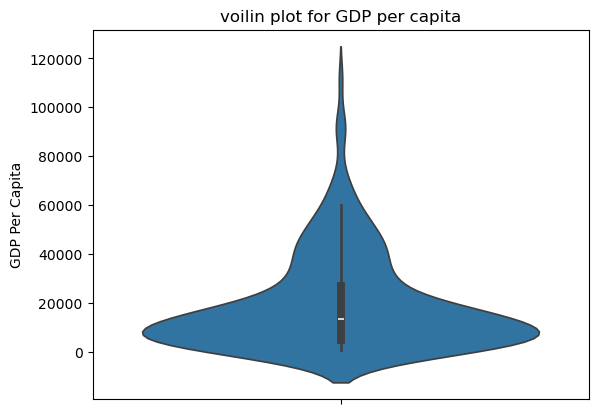

In [29]:
# voilin plot using Seaborn
sns.violinplot(data = gdp_2020, y = 'GDP_Per_Capita')
plt.ylabel('GDP Per Capita')
plt.title('voilin plot for GDP per capita')
#sns.violinplot(y=gdp_2020['GDP_Per_Capita']) 
plt.show()

Text(0.5, 1.0, 'Histogram for GDP per capita')

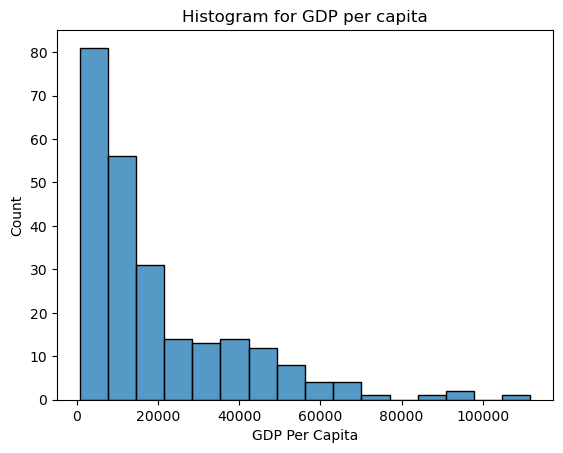

In [30]:
# Histogram using sns
sns.histplot(data = gdp_2020, x = 'GDP_Per_Capita')
plt.xlabel('GDP Per Capita')
plt.title('Histogram for GDP per capita')

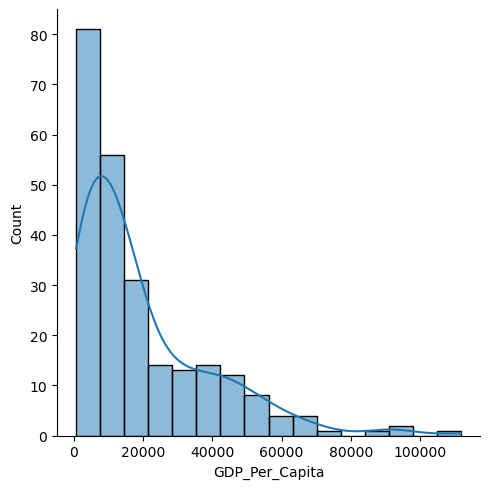

In [31]:
#Histogram with trend line
sns.displot(data=gdp_2020['GDP_Per_Capita'],kde=True)

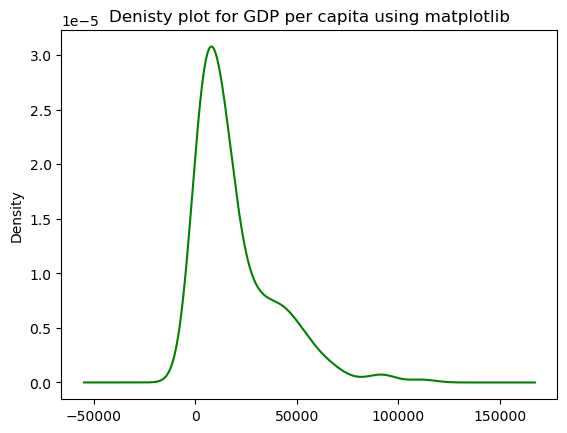

In [32]:
#Create a density plot using matplotlib
gdp_2020.GDP_Per_Capita.plot.density(color='green')
plt.title('Denisty plot for GDP per capita using matplotlib')
plt.show()

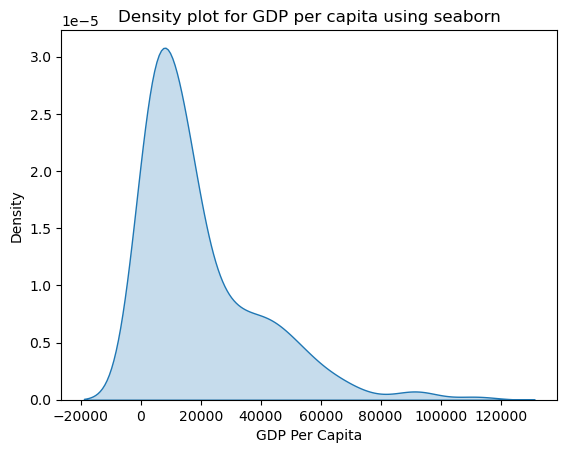

In [33]:
#Create a density plot using seaborn
sns.kdeplot(data = gdp_2020, x= 'GDP_Per_Capita', fill = 'skyblue')
plt.xlabel('GDP Per Capita')
plt.title('Density plot for GDP per capita using seaborn')
plt.show()

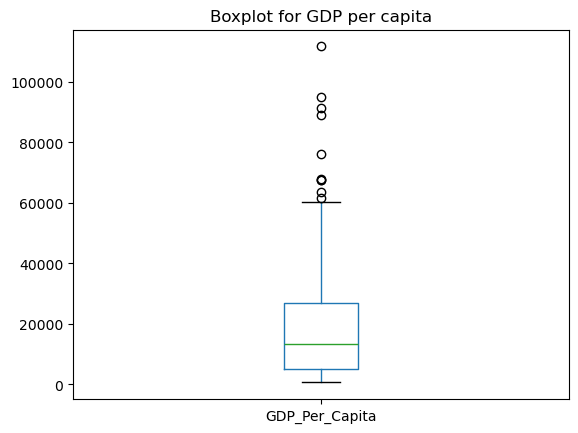

In [34]:
# Boxplot using Pandas
gdp_2020.boxplot(column =['GDP_Per_Capita'], grid = False)
#plt.xlabel('GDP Per Capita')
plt.title('Boxplot for GDP per capita')
plt.show()

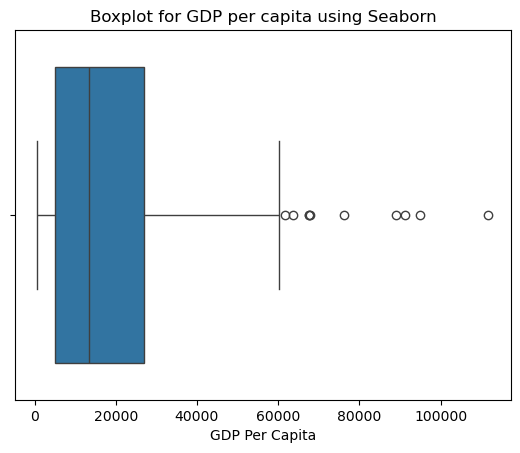

In [35]:
# Boxplot using Seaborn
sns.boxplot(data =gdp_2020, x='GDP_Per_Capita')
plt.xlabel('GDP Per Capita')
plt.title('Boxplot for GDP per capita using Seaborn')
plt.show()

In [36]:
#9. What was the median GDP per capita value in 2020?
gdp_2020['GDP_Per_Capita'].median()

13357.997573370474

In [37]:
###Q10. For this question, you're going to create some visualizations to compare GDP per capita values for 
#the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. 
#Using gdp_decades, create the following 4 plots and Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

# Create a variable decade and put the years we wanted data to be filtered
decades = (1990,2000,2010,2020)

# create a dataframe with filtered 4 decade of data
gdp_decades = gdp_df[gdp_df['Year'].isin(decades)]

gdp_decades #

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


In [38]:
## other one line code by Dibran
#gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

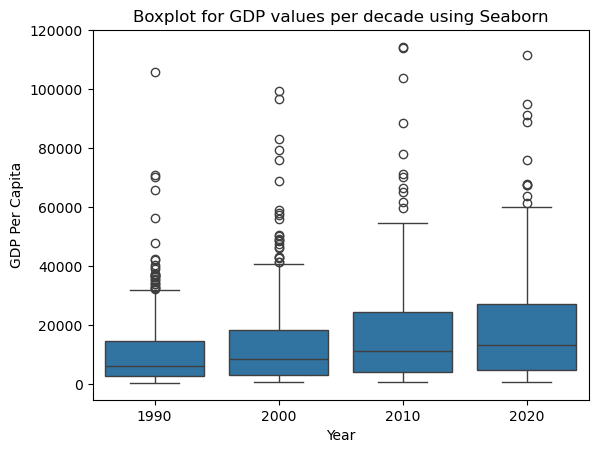

In [39]:
### Q10a. Answer: A boxplot : 
sns.boxplot(data =gdp_decades, x= 'Year', y='GDP_Per_Capita')
plt.ylabel('GDP Per Capita')
plt.title('Boxplot for GDP values per decade using Seaborn')
plt.show()

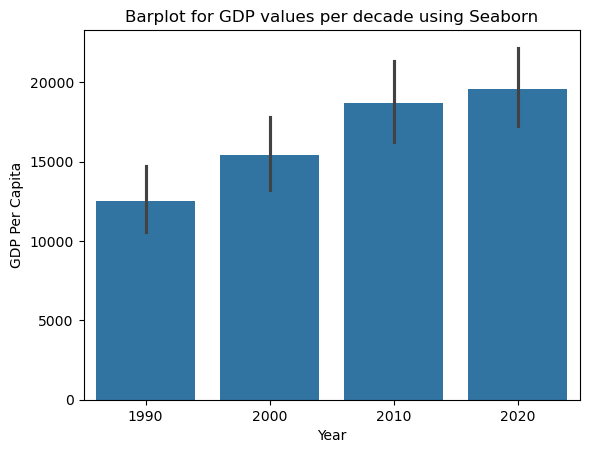

In [40]:
# Q10b. Answer:* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)

sns.barplot(gdp_decades, x= 'Year', y='GDP_Per_Capita') #using Seaborn
plt.ylabel('GDP Per Capita') # create y label
plt.title('Barplot for GDP values per decade using Seaborn')
plt.show()

<BarContainer object of 921 artists>

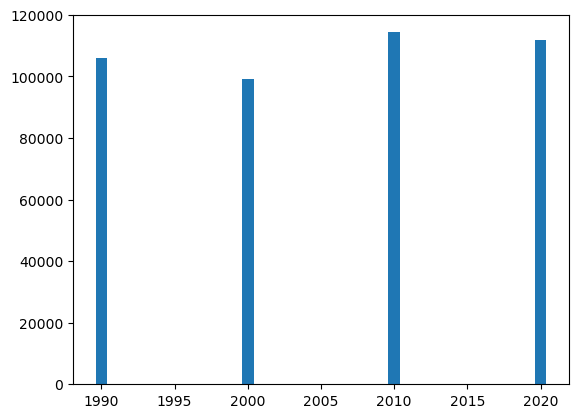

In [41]:
# using matplotlib
plt.bar(gdp_decades.Year, gdp_decades.GDP_Per_Capita) 

Text(0.5, 1.0, 'scatterplot for GDP values using Seaborn')

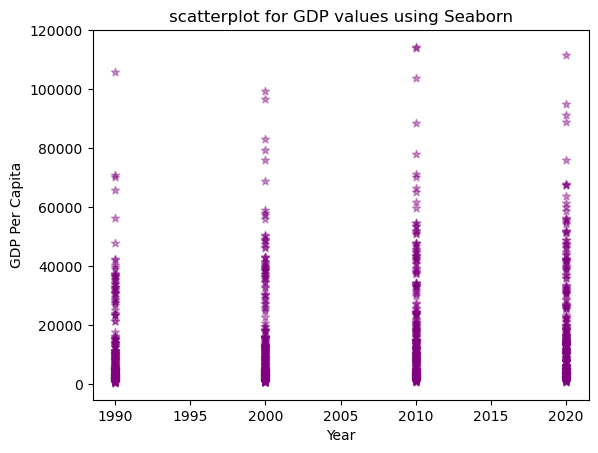

In [42]:
#Q10c. Answer: * A scatterplot
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita, color = 'purple', marker ='*', alpha = 0.4)
plt.ylabel('GDP Per Capita')
plt.xlabel('Year')
plt.title('scatterplot for GDP values using Seaborn')

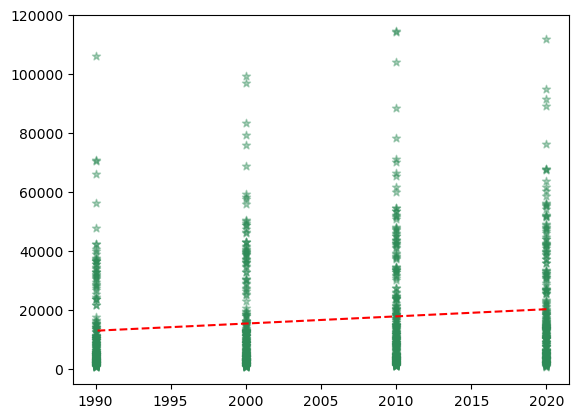

In [43]:
#Q10d. Answer: * A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

# Create a scatterplot using plt.scatter(x, y).
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita, color = 'seagreen', marker ='*', alpha = 0.4)

# Calculate the equation for the trendline using numpy.polyfi.
trend = np.polyfit(gdp_decades.Year,gdp_decades.GDP_Per_Capita ,1)

# pass trend parameter in To create a polynomial, you can pass an array of coefficients to numpy.poly1d
trend_var = np.poly1d(trend)

# Add the trendline to the plot using plt.plot(x, p(x))
plt.plot(gdp_decades.Year, trend_var(gdp_decades.Year),"r--")

# show the graph
plt.show()

 # Dibrans way: sns.regplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita');

In [44]:
# sns.__version__ 
# It gives the version '0.13.2' we are using

In [45]:
### Q11. Which country was the first to have a GDP per capita greater than $100,000? 

# Create a dataframe with records having GDP_Per_Capita greater than $100,000
gdp_1m_plus = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]

# Sort the values in ascending order
gdp_1m_min = gdp_1m_plus.sort_values('GDP_Per_Capita')

# Final conditional and sorted Dataframe
gdp_1m_min[['Country', 'Year', 'GDP_Per_Capita']]

##ANSWER: United Arab Emirates in 1997 is the first country to have a GDP per capita greater than $100,000.

,Country,Year,GDP_Per_Capita
7295,United Arab Emirates,1997,100956.706467
7301,United Arab Emirates,1991,101048.696239
4167,Luxembourg,2001,101143.147977
5751,Qatar,2015,101971.989608
3278,Ireland,2021,102785.490239
4166,Luxembourg,2002,103317.331098
5756,Qatar,2010,103902.519310
4165,Luxembourg,2003,104743.000088
7302,United Arab Emirates,1990,105893.626059
5752,Qatar,2014,106141.326189


In [46]:
###12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')

## Answer: Luxembourg had the highest GDP per capita in 2020

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [47]:
gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')['Country'].tolist()[0]

'Luxembourg'

Text(0, 0.5, 'GDP')

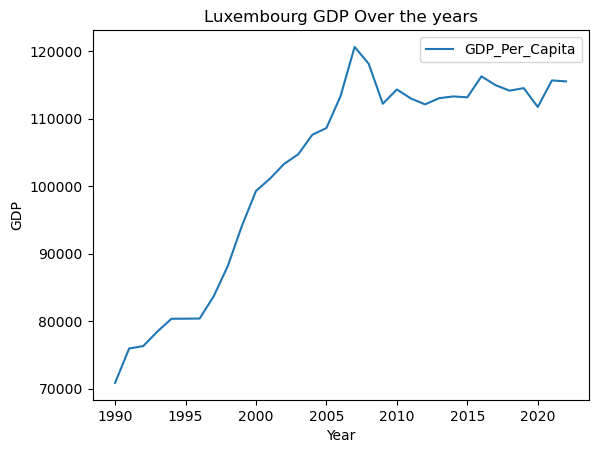

In [48]:
top_country = gdp_df[gdp_df['Country'] == 'Luxembourg']
top_country.plot(x='Year', y='GDP_Per_Capita',kind = 'line')
plt.title('Luxembourg GDP Over the years')
plt.xlabel('Year')
plt.ylabel('GDP')

In [49]:
###13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

gdp_df[gdp_df['Year']==2020].nsmallest(1,'GDP_Per_Capita') 
## Answer 'Burundi' was having the lowest GDP per capita 711.355263 in 2020

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


Text(0, 0.5, 'GDP')

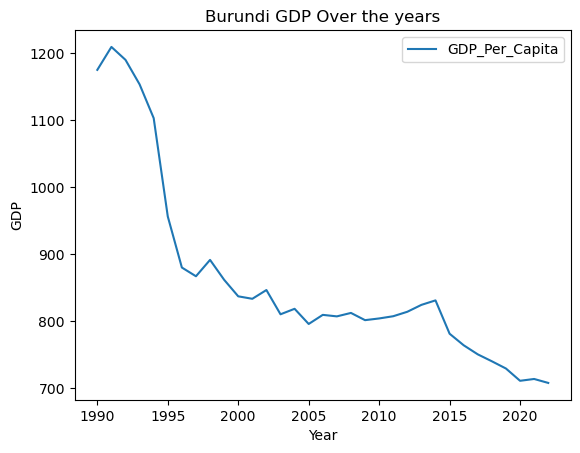

In [50]:
# create a new dataframe bottom_country and load all the data of the country 'Burundi' in it
bottom_country = gdp_df[gdp_df['Country'] == gdp_df[gdp_df['Year']==2020].nsmallest(1,'GDP_Per_Capita')['Country'].tolist()[0]]

# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset
bottom_country.plot(x='Year', y='GDP_Per_Capita',kind = 'line')
plt.title('Burundi GDP Over the years')
plt.xlabel('Year')
plt.ylabel('GDP')

In [51]:
### 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. 
#Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) 
#Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. 
#Also, check the datatypes of the columns.

In [52]:
# Read in the internet use dataset into a DataFrame named `internet_df`
#usecols = [0,1,2,3] parameter beside nrows can be used to subset desired column to create new dataframe
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [53]:
# Read top few rows
internet_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60000,1
1,Afghanistan,2018,16.80000,2
2,Afghanistan,2017,13.50000,3
3,Afghanistan,2016,11.00000,4
4,Afghanistan,2015,8.26000,4
5,Afghanistan,2014,7.00000,4
6,Afghanistan,2013,5.90000,4
7,Afghanistan,2012,5.45455,4
8,Afghanistan,2011,5.00000,4
9,Afghanistan,2010,4.00000,4


In [54]:
# Read top few rows
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6073,Zimbabwe,2002,1.100000,4
6074,Zimbabwe,2001,0.799846,NaN
6075,Zimbabwe,2000,0.401434,NaN
6076,Zimbabwe,1999,0.161676,NaN
6077,Zimbabwe,1998,0.081648,NaN
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [55]:
# check the datatypes of the columns
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


In [56]:
### 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
# Drop the Value Footnotes column 
internet_df = internet_df.drop(columns='Value Footnotes')

# Rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

# check updated data
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [57]:
### Q16. Look at the number of observations in this dataset per year. What do you notice?

internet_df.value_counts('Year')
## ANSWER: 1990 is the highest number of observations and 2023 is the lowest. The number of observations are gradually decreased from 1990 to 2023. 

Year
1990    226
2007    217
2008    214
2011    214
2009    214
2002    214
2001    212
2005    212
2006    212
2004    210
2000    210
2010    209
2012    209
2003    208
1999    207
2016    206
2017    205
2014    204
2013    203
2015    203
1998    195
1997    188
2021    186
2020    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64

In [58]:
### Q17. What is the first year to have a non-zero internet users percentage value?

# Sort values in internet dataframe based on internet users percentage value
net_df_with_value = internet_df.sort_values('Year')

# Add a condition to find out internet users percentage having value greater than 0
net_df_with_value[net_df_with_value['Internet_Users_Pct'] > 0].head(1)

## Answer: 1990 is the first year to have a non-zero internet users percentage value

,Country,Year,Internet_Users_Pct
2796,Israel,1990,0.110774


In [59]:
### Q18. How does the distribution of internet users percent differ for 2000 and 2014?

#Create seperate dataframes for internet user distribution in the year 2000 and 2014
Net_user_2k = internet_df[(internet_df['Year'] == 2000)]
Net_user_2k14 = internet_df[(internet_df['Year'] == 2014)]

# A custom IQR(inter quartile range) function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of net users in the year 2000
print(Net_user_2k['Internet_Users_Pct'].agg([iqr]))

# Print IQR of net users in the year 2014
print(Net_user_2k14['Internet_Users_Pct'].agg([iqr]))

## ANSWER: Internet user percantage distribution has been significantly increased from approx 10.05% in the year 2000 to 52.86% in 2014. 
## This analysis can be visually seen in the boxplot graph below.

iqr    10.056965
Name: Internet_Users_Pct, dtype: float64
iqr    52.8592
Name: Internet_Users_Pct, dtype: float64


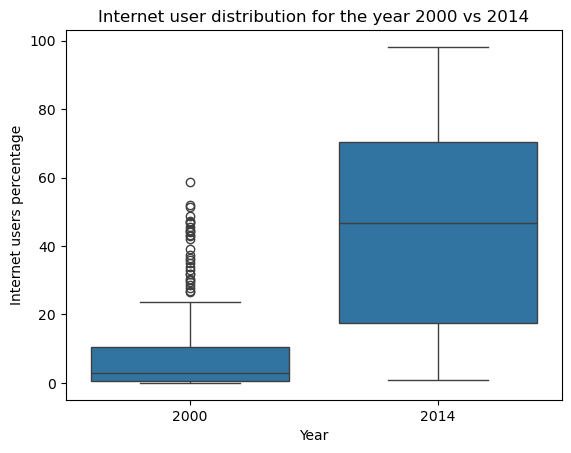

In [60]:
#Create a dataframe containing values from the year 2000 and 2014
per_diff_2k_2k14 = internet_df[(internet_df['Year'] == 2000) | (internet_df['Year'] == 2014)]

# Plot the graph for the distribution of internet users percent for the year 2000 and 2014 to see visual change
sns.boxplot(data =per_diff_2k_2k14, x= 'Year', y='Internet_Users_Pct')
#sns.barplot(per_diff_2k_2k14, x= 'Year', y='Internet_Users_Pct') 
plt.ylabel('Internet users percentage') # create y label
plt.title('Internet user distribution for the year 2000 vs 2014')
plt.show()

In [61]:
# METHOD 2 check if it's right.
# Modify bins to 20
#Net_user_2k [Net_user_2k ["Year"] == 2000][ 'Internet_Users_Pct'].hist(bins=20,alpha=0.5)
# Modify bins to 20
#Net_user_2k14 [Net_user_2k14 ["Year"] == 2014][ 'Internet_Users_Pct'].hist(bins=20,alpha=0.5)
# Add a legend
#plt.legend(["2000", "2014"])
# Show the plot
#plt.show()

In [62]:
# Q19. For how many countries was the percentage of internet users below 5% in 2014?

internet_df[np.logical_and(internet_df['Year'] == 2014,internet_df['Internet_Users_Pct']< 5)].count() # Method 1
#internet_df[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] < 5)].count() # Method 2

##ANSWER: 10 countries

Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64

In [63]:
# Q20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

#Merge 2 dataframes
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on = ['Country','Year'], how = 'outer')

In [64]:
# Look at the first few rows
gdp_and_internet_use.head(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809
5,Afghanistan,2005,1352.320627,1.224150
6,Afghanistan,2006,1366.993146,2.107120
7,Afghanistan,2007,1528.344578,1.900000
8,Afghanistan,2008,1556.844452,1.840000
9,Afghanistan,2009,1823.742614,3.550000


In [65]:
# Look at the last few rows
gdp_and_internet_use.tail(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9102,Zimbabwe,2013,2333.644532,15.5000
9103,Zimbabwe,2014,2316.954536,16.3647
9104,Zimbabwe,2015,2313.878553,22.7428
9105,Zimbabwe,2016,2286.623549,23.1200
9106,Zimbabwe,2017,2331.780833,24.4000
9107,Zimbabwe,2018,2399.621551,25.0000
9108,Zimbabwe,2019,2203.396810,26.5883
9109,Zimbabwe,2020,1990.319419,29.2986
9110,Zimbabwe,2021,2115.144555,32.4616
9111,Zimbabwe,2022,2143.237574,32.5615


In [66]:
#Find out total missing values for each column; Ans: 1450 rows for GDP_Per_capita column and 3029 for Internet_users_pct column
gdp_and_internet_use.isnull().sum()

#gdp_and_internet_use # contains 9112 rows
#gdp_df # contains 7662 rows
#internet_df # contains 6083 rows

Country                  0
Year                     0
GDP_Per_Capita        1450
Internet_Users_Pct    3029
dtype: int64

In [67]:
### Q21. Find the three countries with the highest internet users percentage in 2014. 
gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].sort_values(by = 'Internet_Users_Pct', ascending = False).head(3)

##Answer: Iceland, Falkland (Malvinas) Islands and Bermuda are the 3 countries
## Ryan's code: 
#df_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"]==2014]
#top3_df = df_2014.nlargest(3,"Internet_Users_Pct")

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3820,Iceland,2014,50450.741612,98.158
2780,Falkland (Malvinas) Islands,2014,NaN,97.600
794,Bermuda,2014,77361.104881,96.800


In [68]:
top_net_user_2k14 = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland','Falkland (Malvinas) Islands','Bermuda'])]
top_net_user_2k14

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
770,Bermuda,1990,65961.406278,0.0000
771,Bermuda,1991,63958.896254,NaN
772,Bermuda,1992,64385.407410,NaN
773,Bermuda,1993,65967.850014,NaN
774,Bermuda,1994,65904.720421,NaN
...,...,...,...,...
3824,Iceland,2018,56816.566601,99.0110
3825,Iceland,2019,56584.168683,99.5049
3826,Iceland,2020,51641.392081,99.5328
3827,Iceland,2021,53003.170408,99.6870


In [69]:
## METHOD 2 using loc
# create a list of countries to be selected
countries = ['Bermuda','Falkland (Malvinas) Islands','Iceland']
# create a dataframe with index as country
gdp_and_internet_use_ind= gdp_and_internet_use.set_index(['Country'])
# Slice the rows based on list of countries and then reset index
topinternet= gdp_and_internet_use_ind.loc[countries].reset_index()
# print newly created dataframe subset
topinternet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Bermuda,1990,65961.406278,0.0000
1,Bermuda,1991,63958.896254,NaN
2,Bermuda,1992,64385.407410,NaN
3,Bermuda,1993,65967.850014,NaN
4,Bermuda,1994,65904.720421,NaN
...,...,...,...,...
84,Iceland,2018,56816.566601,99.0110
85,Iceland,2019,56584.168683,99.5049
86,Iceland,2020,51641.392081,99.5328
87,Iceland,2021,53003.170408,99.6870


In [70]:
countries = ['Bermuda','Falkland (Malvinas) Islands','Iceland']
# create a dataframe with index as country
gdp_and_internet_use_ind= gdp_and_internet_use.set_index(['Country'])
gdp_and_internet_use_ind

,Year,GDP_Per_Capita,Internet_Users_Pct
Country,,,
Afghanistan,1990,NaN,0.000000
Afghanistan,2001,NaN,0.004723
Afghanistan,2002,1280.463171,0.004561
Afghanistan,2003,1292.333437,0.087891
Afghanistan,2004,1260.060581,0.105809
...,...,...,...
Zimbabwe,2018,2399.621551,25.000000
Zimbabwe,2019,2203.396810,26.588300
Zimbabwe,2020,1990.319419,29.298600


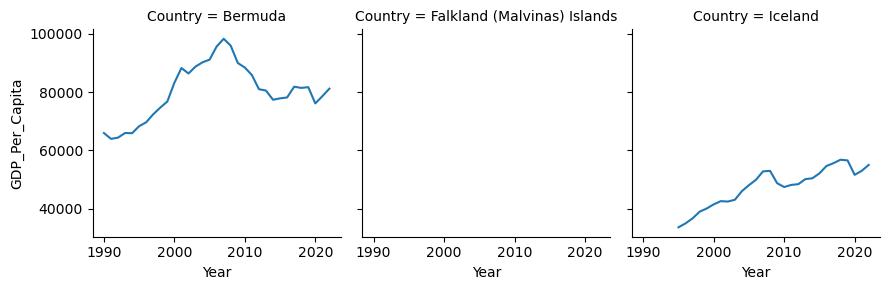

In [71]:
#Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) #to compare how the GDP per capita has changed over time for these three countries. What do you notice?
top_net_user_2k14 = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland','Falkland (Malvinas) Islands','Bermuda'])]
#top_net_user_2k14

# Form a facetgrid using columns
graph = sns.FacetGrid(top_net_user_2k14, col ='Country') 

# map the above form facetgrid with required attributes 
graph.map(plt.plot, 'Year', 'GDP_Per_Capita', linestyle = '-')

##ANSWER: Even if Iceland, Falkland (Malvinas) Islands and Bermuda are highest internet users in 2014, GDP vale for Iceland is very low and Falkland (Malvinas) Islands has null GDP values.

#Ryan's one liner code: sns.FacetGrid(gdp_and_internet_use[gdp_and_internet_use["Country"].isin(top3_df["Country"])], col="Country").map(sns.scatterplot, "Year", "GDP_Per_Capita")

In [72]:
### Q22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2014,2144.449634,7.0000
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3000
145,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN
9011,World,2014,15120.730322,NaN
9039,Yemen,2014,NaN,22.5500
9070,Zambia,2014,3375.941270,6.5000


Text(0.5, 1.0, 'Interet User Percent vs GDP for the year 2014')

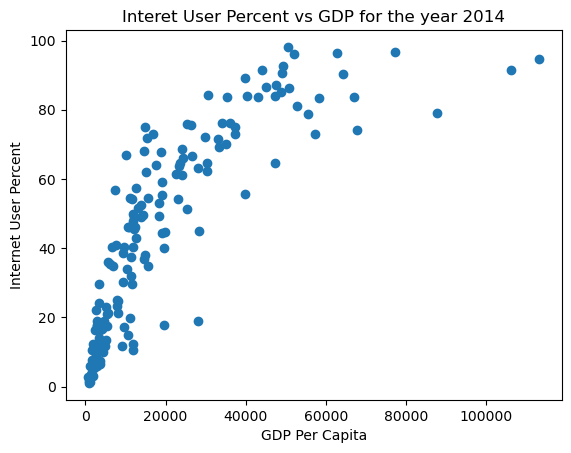

In [73]:
### Q23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. 

plt.scatter(gdp_and_internet_use_2014['GDP_Per_Capita'],gdp_and_internet_use_2014['Internet_Users_Pct'])
#sns.kdeplot(data = gdp_and_internet_use_2014, x= 'GDP_Per_Capita',y ='Internet_Users_Pct')
plt.xlabel("GDP Per Capita")
plt.ylabel("Internet User Percent")
plt.title("Interet User Percent vs GDP for the year 2014")

In [74]:
#What do you notice from this plot? If you see any unusual points, investigate them.
gdp_and_internet_use_2014[(gdp_and_internet_use_2014['GDP_Per_Capita'] > 18000) & (gdp_and_internet_use_2014['Internet_Users_Pct'] <25)]

##ANSWER: Equatorial Guinea and Libya has very low internet user percentage compare to other countries having similar GDP

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2461,Equatorial Guinea,2014,28106.198389,18.86
4839,Libya,2014,19569.900489,17.76


In [75]:
### Q24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)
#to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

#Crreate a dataframe gdp_per_capita_2014 for the year 2014
gdp_per_capita_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014].reset_index(drop=True)
gdp_per_capita_2014 


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2144.449634,7.0000
1,Africa Eastern and Southern,2014,3642.875373,NaN
2,Africa Western and Central,2014,4146.994622,NaN
3,Albania,2014,11586.817446,54.3000
4,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
279,West Bank and Gaza,2014,5967.073437,NaN
280,World,2014,15120.730322,NaN
281,Yemen,2014,NaN,22.5500
282,Zambia,2014,3375.941270,6.5000


In [76]:
gdp_per_capita_2014['GDP_group'] =  pd.qcut(gdp_per_capita_2014['GDP_Per_Capita'], 3, labels=["Low", "Medium", "High"])
gdp_per_capita_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
0,Afghanistan,2014,2144.449634,7.0000,Low
1,Africa Eastern and Southern,2014,3642.875373,NaN,Low
2,Africa Western and Central,2014,4146.994622,NaN,Low
3,Albania,2014,11586.817446,54.3000,Medium
4,Algeria,2014,11561.259795,29.5000,Medium
...,...,...,...,...,...
279,West Bank and Gaza,2014,5967.073437,NaN,Low
280,World,2014,15120.730322,NaN,Medium
281,Yemen,2014,NaN,22.5500,NaN
282,Zambia,2014,3375.941270,6.5000,Low


In [77]:
### Q25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

# perform groupby on GDP_group column and find median internet users percentage  
# do we need to use .fillna(0) method to fill NAN values in the dataframe?
gdp_per_capita_2014.groupby('GDP_group', observed=True)['Internet_Users_Pct'].median().reset_index() 

,GDP_group,Internet_Users_Pct
0,Low,11.0000
1,Medium,45.8752
2,High,75.9800


In [78]:
#gdp_per_capita_2014.loc['GDP_group','Internet_Users_Pct']